#### Pandas Numpy MatPlotLib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import chardet as chd

In [2]:
with open('archivos/titanic.csv', 'rb') as f:
    result = chd.detect(f.read())

In [3]:
result['encoding']

'ascii'

In [4]:
### Direccion del dataset (Utilizar train.csv)

In [5]:
### https://www.kaggle.com/c/titanic/data

#### Leo el csv y lo guardo en data

In [6]:
data = pd.read_csv('archivos/titanic.csv', sep=',', encoding=result['encoding'], low_memory=False)

#### Veo los primeros registros

In [7]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Muestro el total de filas y columnas

In [8]:
data.shape

(891, 12)

#### Total de registros por columna

In [9]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

#### Muestro el nombre de las columnas

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

#### Guardo los datos en una lista y los recorro contantdo el total de valores nulos por columna

In [12]:
columnas = data.columns.tolist()

In [13]:
for column in columnas:
    print("Valores nulos en '{0}': {1}".format(column, data[column].isnull().sum()))

Valores nulos en 'PassengerId': 0
Valores nulos en 'Survived': 0
Valores nulos en 'Pclass': 0
Valores nulos en 'Name': 0
Valores nulos en 'Sex': 0
Valores nulos en 'Age': 177
Valores nulos en 'SibSp': 0
Valores nulos en 'Parch': 0
Valores nulos en 'Ticket': 0
Valores nulos en 'Fare': 0
Valores nulos en 'Cabin': 687
Valores nulos en 'Embarked': 2


In [14]:
data['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

#### Estandarizo los valores de sexo para usarlo siempre asi en otros archivos, M y F 
Creo un diccionario donde defino el valor para cada sexo y luego realizo el reemplazo con lamdba en una fila n.n

In [15]:
sexo = {'male' : 'M', 'female' : 'F'}

In [16]:
data['Sex'] = data['Sex'].apply(lambda x:sexo[x])

#### Verifico los nuevos valores

In [17]:
data['Sex'].head()

0    M
1    F
2    F
3    F
4    M
Name: Sex, dtype: object

#### Combierto los NaN a vacio

In [18]:
data.Age = data.Age.replace(np.nan, 0)
data.Cabin = data.Cabin.replace(np.nan, '')
data.Fare = data.Fare.replace(np.nan, '')
data.Embarked = data.Embarked.replace(np.nan, '')

In [19]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,,S
5,6,0,3,"Moran, Mr. James",M,0.0,0,0,330877,8.4583,,Q
6,7,0,1,"McCarthy, Mr. Timothy J",M,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",M,2.0,3,1,349909,21.0750,,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",F,27.0,0,2,347742,11.1333,,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",F,14.0,1,0,237736,30.0708,,C


#### Vuelvo a contar los NaN para ver si quedo alguno

In [20]:
for column in columnas:
    print("Valores nulos en '{0}': {1}".format(column, data[column].isnull().sum()))

Valores nulos en 'PassengerId': 0
Valores nulos en 'Survived': 0
Valores nulos en 'Pclass': 0
Valores nulos en 'Name': 0
Valores nulos en 'Sex': 0
Valores nulos en 'Age': 0
Valores nulos en 'SibSp': 0
Valores nulos en 'Parch': 0
Valores nulos en 'Ticket': 0
Valores nulos en 'Fare': 0
Valores nulos en 'Cabin': 0
Valores nulos en 'Embarked': 0


#### Descripcion del archivo

In [21]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,23.799293,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,17.596074,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,6.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Personas que no pagaron el pasaje

In [22]:
data[data.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",M,36.0,0,0,LINE,0.0,,S
263,264,0,1,"Harrison, Mr. William",M,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",M,25.0,0,0,LINE,0.0,,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",M,0.0,0,0,239853,0.0,,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",M,19.0,0,0,LINE,0.0,,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",M,0.0,0,0,239853,0.0,,S
466,467,0,2,"Campbell, Mr. William",M,0.0,0,0,239853,0.0,,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",M,0.0,0,0,239854,0.0,,S
597,598,0,3,"Johnson, Mr. Alfred",M,49.0,0,0,LINE,0.0,,S
633,634,0,1,"Parr, Mr. William Henry Marsh",M,0.0,0,0,112052,0.0,,S


#### Supervivientes por sexo

In [23]:
pd.crosstab(data.Survived, data.Sex)

Sex,F,M
Survived,,
0,81,468
1,233,109


#### Supervivientes por sexo por clase de cabina

In [24]:
pclass_gender_survival_count_df = data.groupby( ['Pclass', 'Sex'])['Survived'].sum()
pclass_gender_survival_count_df

Pclass  Sex
1       F      91
        M      45
2       F      70
        M      17
3       F      72
        M      47
Name: Survived, dtype: int64

In [25]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

In [26]:
data.iloc[0, 4]

'M'

In [27]:
data.iloc[1:4, 2:6]

,Pclass,Name,Sex,Age
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0
2,3,"Heikkinen, Miss. Laina",F,26.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0


In [28]:
data.loc[1:2,'Name':"Age"]

,Name,Sex,Age
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0
2,"Heikkinen, Miss. Laina",F,26.0


In [29]:
data.loc[2,['Name',"Age"]]

Name    Heikkinen, Miss. Laina
Age                         26
Name: 2, dtype: object

In [30]:
data[(data.Sex == 'F') | (data.iloc[:,2] == 1) ].iloc[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S


In [31]:
data.loc[:,(data > 1).all()][:3] 

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",M,A/5 21171,,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",F,STON/O2. 3101282,,S


In [32]:
data.loc[:,(data.notnull().all() )][:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,,S


In [33]:
data.loc[:, data.isnull().any()][:3]

""
0
1
2


In [34]:
data[(data.iloc[:,2] == 1) & (data.Sex == 'F')].shape

(94, 12)

In [35]:
data[(data.iloc[:,2] == 1) & (data.Sex == 'M')].shape

(122, 12)

In [36]:
sum((data.Age > 25) & (data.Sex == 'M'))/data.shape[0] 

0.3075196408529742

In [37]:
sum((data.Age > 25) & (data.Sex == 'F'))/data.shape[0] 

0.15600448933782268

In [38]:
sum((data.Survived != 0) & (~(data.Pclass == 3)) ) 

223

In [39]:
data.query('Age > PassengerId')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,,S
6,7,0,1,"McCarthy, Mr. Timothy J",M,54.0,0,0,17463,51.8625,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",F,27.0,0,2,347742,11.1333,,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",F,14.0,1,0,237736,30.0708,,C
11,12,1,1,"Bonnell, Miss. Elizabeth",F,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",M,20.0,0,0,A/5. 2151,8.0500,,S


In [40]:
data.filter(items=['Age', 'Sex'])[:2]

,Age,Sex
0,22.0,M
1,38.0,F


In [41]:
data.filter(items=[0,5], axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,,S
5,6,0,3,"Moran, Mr. James",M,0.0,0,0,330877,8.4583,,Q


In [42]:
data.filter(like = 'ed', axis=1)[:2]

,Survived,Embarked
0,0,S
1,1,C


In [43]:
data.filter(regex='ed$', axis=1)[:2]

,Survived,Embarked
0,0,S
1,1,C


In [44]:
data[data.Pclass.isin([0,1])].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",M,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",F,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",M,28.0,0,0,113788,35.5000,A6,S


In [45]:
data.set_index('Ticket')[:2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Ticket,,,,,,,,,,,
A/5 21171,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,7.2500,,S
PC 17599,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,71.2833,C85,C


In [46]:
data.set_index(['Ticket', 'Name'])[:2]

,,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Ticket,Name,,,,,,,,,,
A/5 21171,"Braund, Mr. Owen Harris",1,0,3,M,22.0,1,0,7.2500,,S
PC 17599,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,F,38.0,1,0,71.2833,C85,C


In [47]:
data.set_index(['Ticket', 'Name']).index[0]

('A/5 21171', 'Braund, Mr. Owen Harris')

In [48]:
data_index = data.set_index(['Ticket', 'Name'])

In [49]:
data_index

,,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Ticket,Name,,,,,,,,,,
A/5 21171,"Braund, Mr. Owen Harris",1,0,3,M,22.0,1,0,7.2500,,S
PC 17599,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,F,38.0,1,0,71.2833,C85,C
STON/O2. 3101282,"Heikkinen, Miss. Laina",3,1,3,F,26.0,0,0,7.9250,,S
113803,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,F,35.0,1,0,53.1000,C123,S
373450,"Allen, Mr. William Henry",5,0,3,M,35.0,0,0,8.0500,,S
330877,"Moran, Mr. James",6,0,3,M,0.0,0,0,8.4583,,Q
17463,"McCarthy, Mr. Timothy J",7,0,1,M,54.0,0,0,51.8625,E46,S
349909,"Palsson, Master. Gosta Leonard",8,0,3,M,2.0,3,1,21.0750,,S
347742,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",9,1,3,F,27.0,0,2,11.1333,,S


In [50]:
data_index[:2]

,,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Ticket,Name,,,,,,,,,,
A/5 21171,"Braund, Mr. Owen Harris",1,0,3,M,22.0,1,0,7.2500,,S
PC 17599,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,F,38.0,1,0,71.2833,C85,C


In [51]:
data_index.reset_index()[:2]

,Ticket,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,A/5 21171,"Braund, Mr. Owen Harris",1,0,3,M,22.0,1,0,7.2500,,S
1,PC 17599,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,1,F,38.0,1,0,71.2833,C85,C


In [52]:
data.rename(columns={'Name': 'Whats_name', 'Fare':'Price'})[:2]

,PassengerId,Survived,Pclass,Whats_name,Sex,Age,SibSp,Parch,Ticket,Price,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C


In [53]:
data.rename(mapper=str.lower, axis='columns')[:2]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C


In [54]:
data.Sex.unique()

array(['M', 'F'], dtype=object)

In [55]:
sum(data.PassengerId.duplicated())

0

In [56]:
sum(data.index.duplicated())

0

In [57]:
data.loc[:,['Sex', 'Embarked']].drop_duplicates()

,Sex,Embarked
0,M,S
1,F,C
2,F,S
5,M,Q
22,F,Q
26,M,C
61,F,


In [58]:
data.groupby(by = ['Sex']).count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
F,314,314,314,314,314,314,314,314,314,314,314
M,577,577,577,577,577,577,577,577,577,577,577


In [59]:
data.groupby(by = ['Sex', 'Survived']).mean().loc[:,'Age']

Sex  Survived
F    0           19.790123
     1           24.390558
M    0           24.321581
     1           23.272202
Name: Age, dtype: float64

In [60]:
data_index = data.set_index(['Sex', 'Pclass'])
data_index.groupby(level=[0,1]).agg({'Fare': lambda x: sum(x)/len(x),
                                  'Age' : np.mean})

Fare        Age
Sex Pclass                       
F   1       106.125798  31.297872
    2        21.970121  27.967105
    3        16.118810  15.406250
M   1        67.226127  34.175574
    2        19.741782  28.178981
    3        12.661633  19.326859

In [61]:
data_index.groupby(level=[0,1]).transform(lambda x: sum(x)/len(x)).head()

PassengerId  Survived        Age     SibSp     Parch        Fare
Sex Pclass                                                                  
M   3        455.515850  0.135447  19.326859  0.498559  0.224784   12.661633
F   1        469.212766  0.968085  31.297872  0.553191  0.457447  106.125798
    3        399.729167  0.500000  15.406250  0.895833  0.798611   16.118810
    1        469.212766  0.968085  31.297872  0.553191  0.457447  106.125798
M   3        455.515850  0.135447  19.326859  0.498559  0.224784   12.661633

In [62]:
data.dropna(axis=0,  how='any').shape

(891, 12)

In [63]:
data.dropna(axis=0, how='all').shape

(891, 12)

In [64]:
[set(data.columns) - set(data.dropna(axis=1, how='any').columns)]

[set()]

In [65]:
data.fillna(np.mean)[:1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.25,,S


In [66]:
data1 = pd.DataFrame({'x1': list('abc'), 'x2': [11.432, 1.303, 99.906]})

In [67]:
data2 = pd.DataFrame({'x1': list('abd'), 'x3': [20.784,  np.NaN, 20.784]})

In [68]:
data1

,x1,x2
0,a,11.432
1,b,1.303
2,c,99.906


In [69]:
data2

,x1,x3
0,a,20.784
1,b,NaN
2,d,20.784


In [70]:
data1.merge(data2, how='inner', on='x1')

,x1,x2,x3
0,a,11.432,20.784
1,b,1.303,NaN


In [71]:
data1.merge(data2, how='outer', on='x1')

,x1,x2,x3
0,a,11.432,20.784
1,b,1.303,NaN
2,c,99.906,NaN
3,d,NaN,20.784


In [72]:
pd.concat([data1, data2], axis=0, sort=False)

,x1,x2,x3
0,a,11.432,NaN
1,b,1.303,NaN
2,c,99.906,NaN
0,a,NaN,20.784
1,b,NaN,NaN
2,d,NaN,20.784


In [73]:
pd.concat([data1, data2], axis=0, ignore_index=True,sort=False)

,x1,x2,x3
0,a,11.432,NaN
1,b,1.303,NaN
2,c,99.906,NaN
3,a,NaN,20.784
4,b,NaN,NaN
5,d,NaN,20.784


In [74]:
data2.loc[3] = ['g', 500]
data2

,x1,x3
0,a,20.784
1,b,NaN
2,d,20.784
3,g,500.000


In [75]:
pd.concat([data1, data2], axis=1)

,x1,x2,x1,x3
0,a,11.432,a,20.784
1,b,1.303,b,NaN
2,c,99.906,d,20.784
3,NaN,NaN,g,500.000


In [76]:
pd.to_datetime('2018-2-19')

Timestamp('2018-02-19 00:00:00')

In [77]:
pd.date_range('2018-4-18', periods=6, freq='d')

DatetimeIndex(['2018-04-18', '2018-04-19', '2018-04-20', '2018-04-21',
               '2018-04-22', '2018-04-23'],
              dtype='datetime64[ns]', freq='D')

In [78]:
data1['date'] = pd.date_range('2018-4-18', periods=3, freq='d')

In [79]:
data1.date

0   2018-04-18
1   2018-04-19
2   2018-04-20
Name: date, dtype: datetime64[ns]

In [80]:
pd.DatetimeIndex(data1.date)

DatetimeIndex(['2018-04-18', '2018-04-19', '2018-04-20'], dtype='datetime64[ns]', name='date', freq=None)

In [81]:
data.pivot(index='Sex', columns = 'PassengerId', values = 'Age')

PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Sex,,,,,,,,,,,,,,,,,,,,,
F,NaN,38.0,26.0,35.0,NaN,NaN,NaN,NaN,27.0,14.0,...,NaN,22.0,NaN,NaN,39.0,NaN,19.0,0.0,NaN,NaN
M,22.0,NaN,NaN,NaN,35.0,0.0,54.0,2.0,NaN,NaN,...,33.0,NaN,28.0,25.0,NaN,27.0,NaN,NaN,26.0,32.0


In [82]:
data.stack()

0    PassengerId                                                    1
     Survived                                                       0
     Pclass                                                         3
     Name                                     Braund, Mr. Owen Harris
     Sex                                                            M
     Age                                                           22
     SibSp                                                          1
     Parch                                                          0
     Ticket                                                 A/5 21171
     Fare                                                        7.25
     Cabin                                                           
     Embarked                                                       S
1    PassengerId                                                    2
     Survived                                                       1
     Pclass         

In [83]:
list(data.Sex.iteritems())[:5]

[(0, 'M'), (1, 'F'), (2, 'F'), (3, 'F'), (4, 'M')]

In [84]:
f = lambda x: x**2 if type(x) == float else x**3 if type(x) == int else x

In [85]:
data.Fare.apply(f)[:3]

0      52.562500
1    5081.308859
2      62.805625
Name: Fare, dtype: float64

In [86]:
data.applymap(f)[:3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,27,"Braund, Mr. Owen Harris",M,484.0,1,0,A/5 21171,52.562500,,S
1,8,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,1444.0,1,0,PC 17599,5081.308859,C85,C
2,27,1,27,"Heikkinen, Miss. Laina",F,676.0,0,0,STON/O2. 3101282,62.805625,,S


In [87]:
data.Name.str.lower().head()

0                              braund, mr. owen harris
1    cumings, mrs. john bradley (florence briggs th...
2                               heikkinen, miss. laina
3         futrelle, mrs. jacques heath (lily may peel)
4                             allen, mr. william henry
Name: Name, dtype: object

In [88]:
data.Sex.str.upper().head()

0    M
1    F
2    F
3    F
4    M
Name: Sex, dtype: object

In [89]:
data.Name.str.len().head()

0    23
1    51
2    22
3    44
4    24
Name: Name, dtype: int64

In [90]:
data.Name.str.split(pat=',',expand=True).head().rename(columns={0:'First_Name', 1: 'Last_Name'})

,First_Name,Last_Name
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry


In [91]:
data.Name.str.split(expand=False).head()

0                         [Braund,, Mr., Owen, Harris]
1    [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                           [Heikkinen,, Miss., Laina]
3    [Futrelle,, Mrs., Jacques, Heath, (Lily, May, ...
4                        [Allen,, Mr., William, Henry]
Name: Name, dtype: object

In [92]:
data.Name.str.replace('Mr.', '').head()

0                                Braund,  Owen Harris
1    Cumings, . John Bradley (Florence Briggs Thayer)
2                              Heikkinen, Miss. Laina
3           Futrelle, . Jacques Heath (Lily May Peel)
4                               Allen,  William Henry
Name: Name, dtype: object

In [93]:
data.Name.str.split().get(1)

['Cumings,', 'Mrs.', 'John', 'Bradley', '(Florence', 'Briggs', 'Thayer)']

In [94]:
data.Name.str.extract('(?P<Last_Name>[a-zA-Z]+)', expand=True).head()

,Last_Name
0,Braund
1,Cumings
2,Heikkinen
3,Futrelle
4,Allen


### Muestro en graficos

Text(0.5, 1.0, 'Cuenta total de sobrevivientes')

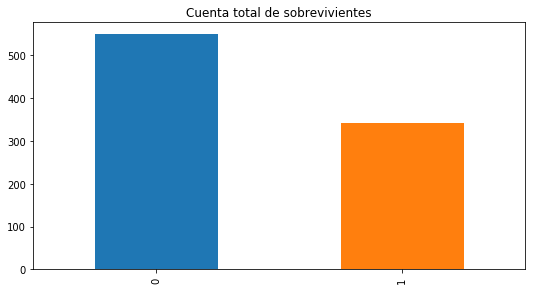

In [95]:
### Muestro la info en dos graficos uno al lado del otro
### Creo un canvas de 30,10

fig = plt.figure(figsize=(30,10))

### Grafico de la izquierda 0,0
plt.subplot2grid((2,3), (0,0))
data.Survived.value_counts().plot(kind='bar', alpha=1)
plt.title('Cuenta total de sobrevivientes')

### El valor de alpha es la transparencia que se aplica al color 

### Sobrevivientes por sexo

Text(0.5, 1.0, 'Sobrevivientes por clase de habitacion')

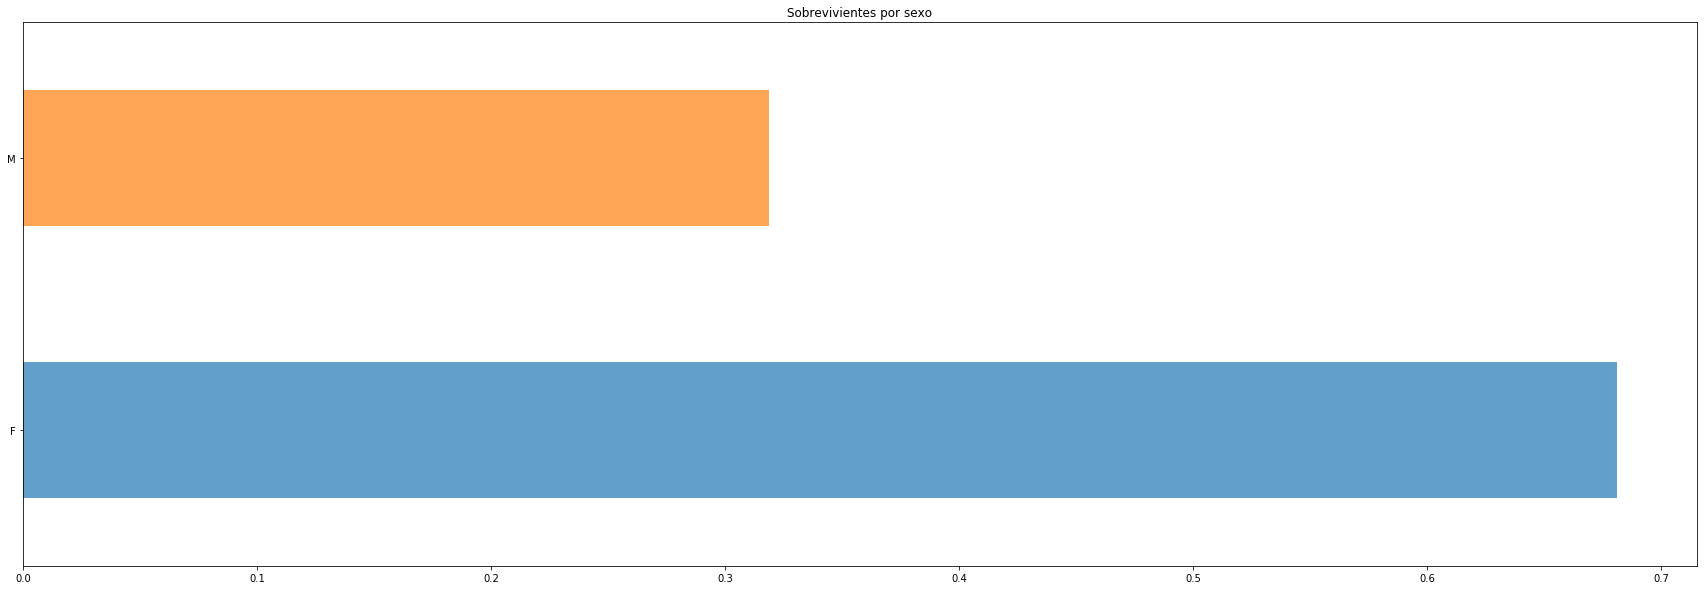

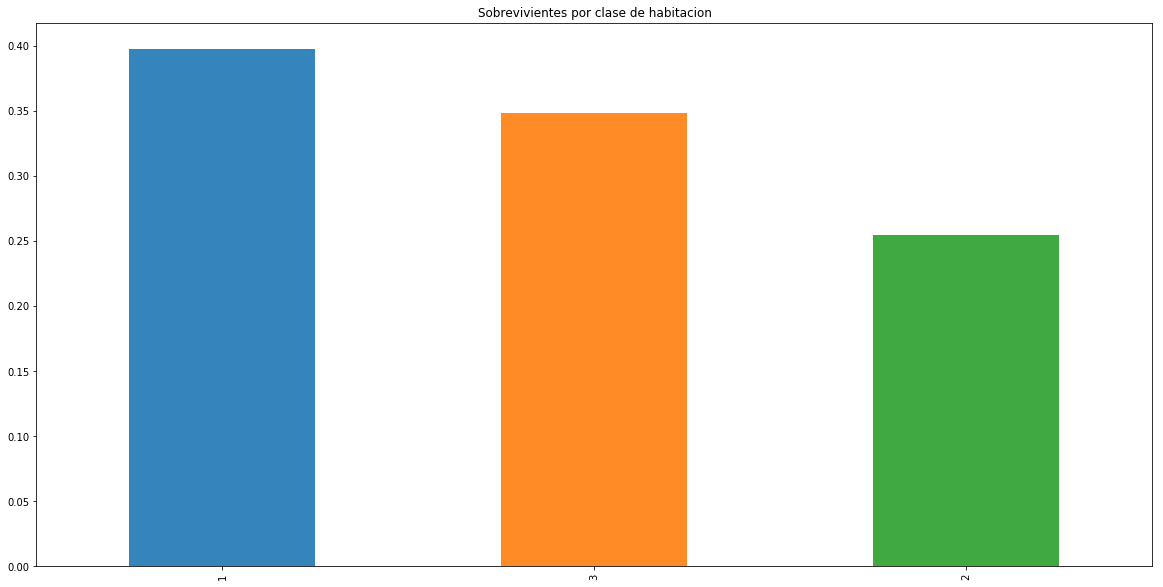

In [97]:
fig = plt.figure(figsize=(30,10))
data.Sex[data.Survived == 1].value_counts(normalize = True).plot(kind='barh', alpha = 0.7)
plt.title('Sobrevivientes por sexo')


fig = plt.figure(figsize=(20, 10))
data.Pclass[data.Survived == 1].value_counts(normalize = True).plot(kind='bar', alpha= 0.9)
plt.title('Sobrevivientes por clase de habitacion')

### Relación entre tipo de ticket y edad

In [98]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [99]:
data = data.astype({'Age':'int'})

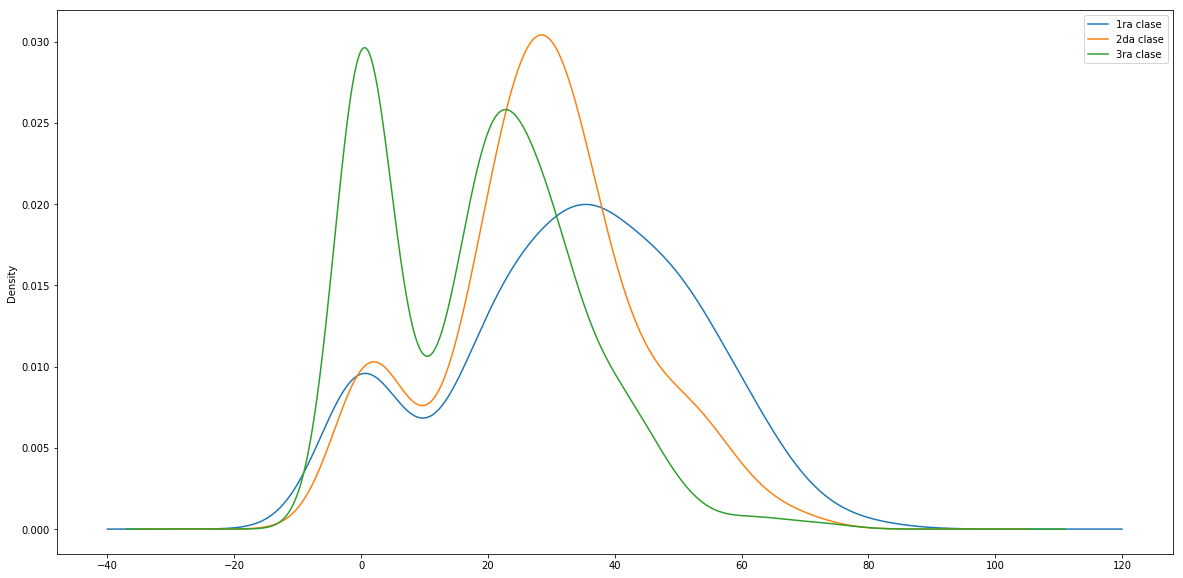

In [100]:
fig = plt.figure(figsize=(20,10))
for t_class in [1,2,3]:
    data.Age[data.Pclass == t_class].plot(kind='kde')

plt.legend(('1ra clase', '2da clase', '3ra clase'))

In [101]:
data[data.Age < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",M,0,0,0,330877,8.4583,,Q
17,18,1,2,"Williams, Mr. Charles Eugene",M,0,0,0,244373,13.0000,,S
19,20,1,3,"Masselmani, Mrs. Fatima",F,0,0,0,2649,7.2250,,C
26,27,0,3,"Emir, Mr. Farred Chehab",M,0,0,0,2631,7.2250,,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",F,0,0,0,330959,7.8792,,Q
29,30,0,3,"Todoroff, Mr. Lalio",M,0,0,0,349216,7.8958,,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",F,0,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",F,0,0,0,335677,7.7500,,Q
36,37,1,3,"Mamee, Mr. Hanna",M,0,0,0,2677,7.2292,,C
42,43,0,3,"Kraeff, Mr. Theodor",M,0,0,0,349253,7.8958,,C
